<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

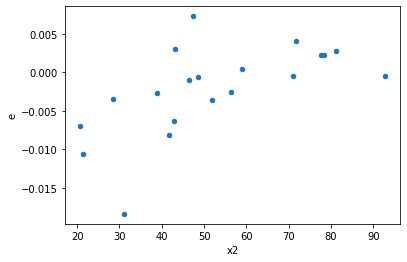

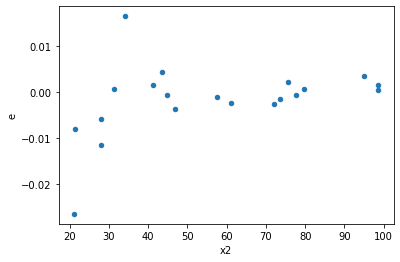

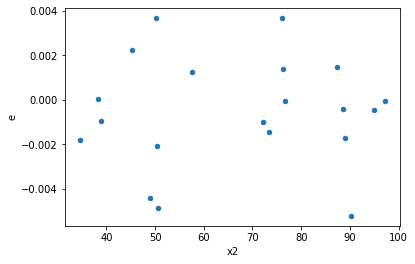

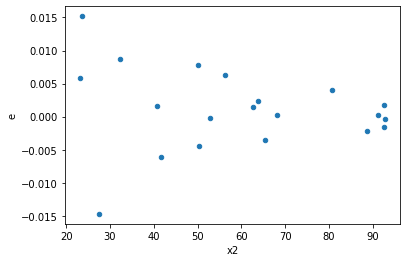

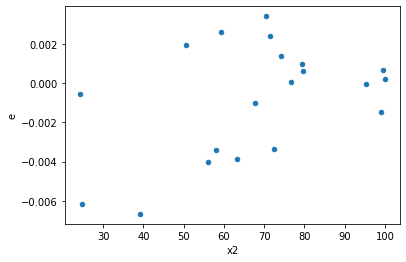

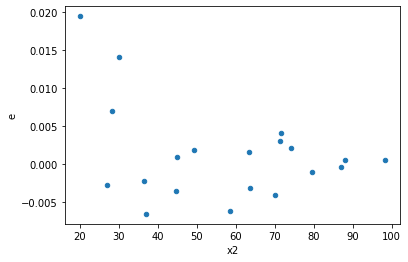

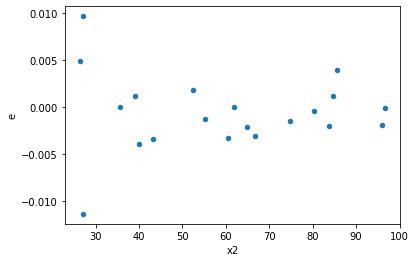

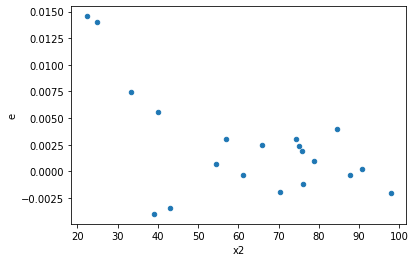

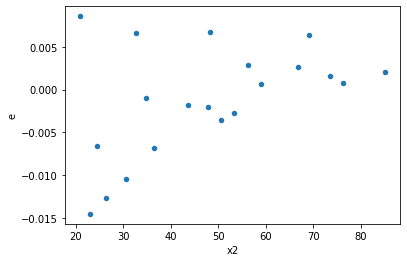

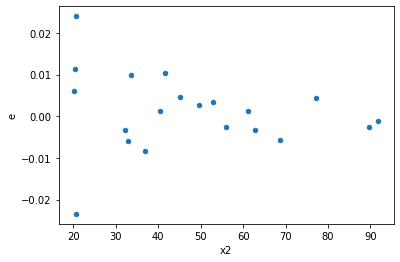

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,3.0,0.0004892258507712633,0.0004430307900814788,4.4475077342842116e-05,0.0001476769300271596,3.320442343220049,0.35208159515205795,0.823959202423971,0.17604079757602897,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,2.6006395660827392e-05,5.5322054206331125e-05,3.715199380118199e-06,7.903150600904447e-06,2.1272480403603558,0.34061050038970686,0.8296947498051466,0.17030525019485343,Reject001=1 : Homoscedasticity
3.0,9.0,5.0,0.00012013470784602605,0.0004760922832024781,1.3348300871780672e-05,9.521845664049562e-05,7.133376566435861,0.043476344024844904,0.9782618279875775,0.021738172012422452,Reject001=1 : Homoscedasticity
4.0,1.0,13.0,3.8168246038213435e-26,7.910570723346302e-05,3.8168246038213435e-26,6.085054402574078e-06,1.594271425645763e+20,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
7.0,10.0,4.0,3.218424184967764e-05,0.00011705425567829721,3.2184241849677644e-06,2.9263563919574303e-05,9.092513055381296,0.04756111160142562,0.9762194441992872,0.02378055580071281,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.00020856306262423887,9.71096004322672e-05,2.0856306262423887e-05,2.42774001080668e-05,1.1640316268181476,0.9593078914436477,0.5203460542781762,0.47965394572182385,Reject001=1 : Homoscedasticity
12.0,4.0,10.0,7.376847872661215e-05,0.0006188866834453771,1.8442119681653037e-05,6.188866834453771e-05,3.355832703228092,0.10964239176366575,0.9451788041181671,0.054821195881832874,Reject001=1 : Homoscedasticity
13.0,5.0,9.0,1.614551954933811e-05,0.000793789097894084,3.229103909867622e-06,8.819878865489822e-05,27.313704085327483,6.955956782461747e-05,0.9999652202160877,3.477978391230874e-05,Reject001=0 : Heteroscedasticity
14.0,7.0,7.0,9.575076595003661e-05,0.00021051640575848766,1.367868085000523e-05,3.0073772251212523e-05,2.198587172329635,0.3203970312914337,0.8398014843542831,0.16019851564571685,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,1.0,0.00038001443945110953,5.856503360360792e-27,2.9231879957777656e-05,5.856503360360792e-27,2.003464494524433e-22,6.916195479995577e-135,Reject001=0 : Heteroscedasticity
1.0,11.0,3.0,0.0004892258507712633,0.0004430307900814788,4.4475077342842116e-05,0.0001476769300271596,3.320442343220049,0.35208159515205795,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,2.6006395660827392e-05,5.5322054206331125e-05,3.715199380118199e-06,7.903150600904447e-06,2.1272480403603558,0.34061050038970686,Reject001=1 : Homoscedasticity
3.0,9.0,5.0,0.00012013470784602605,0.0004760922832024781,1.3348300871780672e-05,9.521845664049562e-05,7.133376566435861,0.043476344024844904,Reject001=1 : Homoscedasticity
4.0,1.0,13.0,3.8168246038213435e-26,7.910570723346302e-05,3.8168246038213435e-26,6.085054402574078e-06,1.594271425645763e+20,0.0,Reject001=0 : Heteroscedasticity
5.0,9.0,5.0,0.00024207349222520982,5.055217114925855e-05,2.689705469168998e-05,1.011043422985171e-05,0.3758937305866205,0.19173872691749005,Reject001=1 : Homoscedasticity
6.0,13.0,1.0,0.00011920921374109053,5.331437541845686e-26,9.169939518545425e-06,5.331437541845686e-26,5.8140378473198275e-21,2.2253205967620977e-125,Reject001=0 : Heteroscedasticity
7.0,10.0,4.0,3.218424184967764e-05,0.00011705425567829721,3.2184241849677644e-06,2.9263563919574303e-05,9.092513055381296,0.04756111160142562,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,0.00020856306262423887,9.71096004322672e-05,2.0856306262423887e-05,2.42774001080668e-05,1.1640316268181476,0.9593078914436477,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      706
Reject001=0 : Heteroscedasticity    294
Name: Result_test, dtype: int64